In [18]:
import pandas as pd


In [27]:
data = pd.read_csv('../data/input/bank-additional-full.csv', sep=';')

pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
data.shape

(41188, 21)

## 1. Check data types
The data types in this dataset make sense. All of the columns that we would expect to have numeric types seem to have numeric types. 

In [26]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## 2. Check missing data
After a quick check for null values in the dataset, it seems that there are no null values. Any values where data was not available must be imputed with a value already. We should take note of these values, especially for numeric variables, to make sure that that are no imputed values that could affect the performance of our model (ie. if null values for a numeric variable that ranges from 1 - 10 were imputed with 999).  

In [36]:
 data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 3. Categorical variables
There are no categories that look like they need to be combined at this point for any of the categorical variables. We may decide to combine categories later to improve model performance, but there are no categories that obviously mean the same thing or have very small frequency counts.

In [35]:
for col in data.select_dtypes(include='object'):
    print(f'\n\nColumn name: {col}')
    print(data[col].value_counts())



Column name: job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Column name: marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Column name: education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Column name: default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Column name: housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Column name: loan
no         33950
yes         6248
unknown      

## 4. Continuous variables
The continuous variables appear to have logical values. We should keep an eye on the pdays column as this column was imputed with a large value in most cases.

In [24]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

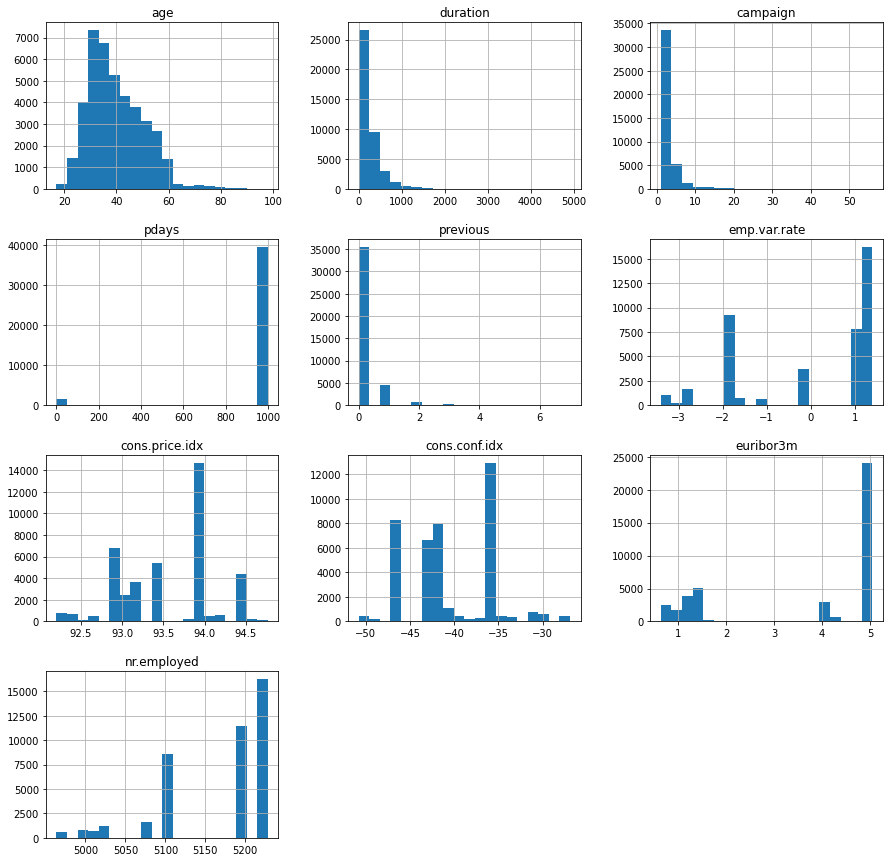

In [41]:
data.hist(
    figsize=(15,15),
    layout=(4,3),
    bins=20
    )

## 5. Duplicated
There is no ID in this dataset so there is no way to know for sure whether records are duplicated. That being said, there are only 12 records in the dataset for which all the features are the same. There does not seem to be a duplication issue. 

In [48]:
sum(data.duplicated())


12

## 6. Custom checks
This dataset is already relatively clean and standardized. No further checks are required.